In [2]:
import yfinance as yf
import random
import matplotlib.pyplot as plt
import pandas as pd
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go


def market_cap_enterprise_value(symbol):
    """
    Market Capitalization (Capitalización de Mercado):
La capitalización de mercado es el valor total de todas las acciones en circulación de una empresa multiplicado 
por el precio actual de sus acciones en el mercado. Es una métrica que refleja la percepción del mercado 
sobre el valor total de una empresa en función del precio de mercado de sus acciones.

Fórmula de Capitalización de Mercado:
Capitalización de Mercado = Precio por Acción * Número de Acciones en Circulación

Esta métrica proporciona una idea de la magnitud de una empresa en el mercado y se utiliza para clasificar empresas
en diferentes categorías, como "grandes", "medianas" o "pequeñas", según su capitalización de mercado.

Enterprise Value (Valor de la Empresa):
El Enterprise Value (EV) es una métrica que considera no solo el valor de mercado de las acciones,
sino también el valor total de la deuda neta y otros pasivos de la empresa. En esencia, el EV refleja
cuánto costaría adquirir la empresa, teniendo en cuenta su valor en el mercado más sus obligaciones financieras.

Fórmula de Valor de la Empresa:
Enterprise Value = Capitalización de Mercado + Deuda Neta + Intereses Minoritarios + Participaciones Preferentes - Efectivo y Equivalentes de Efectivo

El Enterprise Value es especialmente útil en situaciones en las que se está considerando
la adquisición de una empresa, ya que refleja el costo real de adquirir la totalidad de la empresa,
incluidos sus compromisos financieros. También es una medida más completa para comparar empresas que pueden
tener diferentes estructuras de capital y niveles de endeudamiento.
    """
    
    # Define el símbolo de la acción
    symbol = symbol  # Ejemplo con Apple

    # Genera un identificador de usuario aleatorio
    user_agent = f'Mozilla/{random.randint(0, 1000)}.0'

    # Configura el identificador de usuario
    yf.pdr_override()  # Se recomienda usar esta función antes de usar yfinance.Ticker
    yf.Ticker._DEFAULT_USER_AGENT = user_agent

    # Crea un objeto Ticker para obtener información de la acción
    ticker = yf.Ticker(symbol)

    # Obtén la información de la acción, incluyendo el market cap y el enterprise value
    info = ticker.info

    # Accede al market cap: Valor o precio que el mercado atribuye a una compañía.
    # Número total de acciones * precio al que cotizan. No incluye deuda ni caja de empresa.
    market_cap = info['marketCap']
    count_market_cap = len(str(abs(market_cap)))

    # Accede al enterprise value: Valor total de una empresa, incluyendo deuda neta y caja de la empresa.
    #market cap + deuda - caja(ahorro que debe contrarrestar a la deuda)
    enterprise_value = info['enterpriseValue']
    count_enterprise_value = len(str(abs(enterprise_value)))


    

    print(f"Market Cap: {market_cap} dólares. Hay {count_market_cap} números.")
    print(f"Enterprise Value: {enterprise_value} dólares. Hay {count_enterprise_value} números.")
    #print("Varianza de los precios de cierre:", variance)
    
market_cap_enterprise_value(symbol ='GRF.MC')

#Market Cap: 1442304491520 dólares. Hay 13 números.
#Enterprise Value: 1560682168320 dólares. Hay 13 números.
#Varianza de los precios de cierre: 199.1762777492956

ModuleNotFoundError: No module named 'matplotlib'

[*********************100%%**********************]  1 of 1 completed


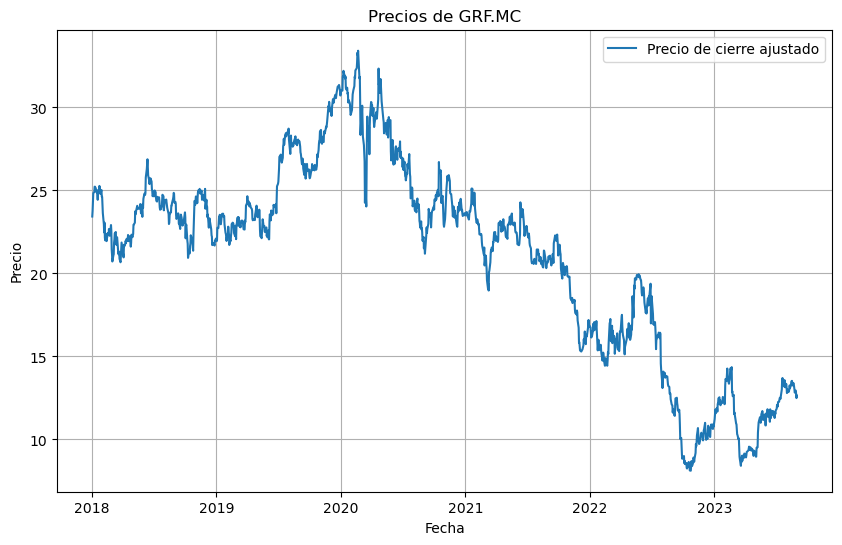

In [2]:
def representacion_unica(symbol):
    # Símbolo de Amazon en Yahoo Finance
    symbol = symbol

    # Obtener los datos históricos de precios desde Yahoo Finance
    data = yf.download(symbol, start="2018-01-01", end="2023-09-01")

    # Crear un DataFrame desde los datos
    df = pd.DataFrame(data['Adj Close'])

    # Representación gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Adj Close'], label='Precio de cierre ajustado')
    plt.title(f"Precios de {symbol}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio")
    plt.legend()
    plt.grid(True)
    plt.show()
representacion_unica(symbol='GRF.MC')

El objetivo de EBITDA (earning before interest, tax, depreciation and amortization)
es evaluar la capacidad que tiene una empresa para generar
beneficios, teniendo solo en cuenta su actividad productiva.

Es decir 

$$ EBITDA = ingresos - Gastos de explotacion de la empresa  $$

Se exceptuan los gastos financieros, por lo que solo se tendria en cuenta en los gastos la materia, gasto de personal etc


$$ MargenEbitda = \frac{Margen}{ventas} $$

Esto va a ser una herramienta perfecta para realizar comparativas con otras empresas ya que no tiene en cuenta impuestos.


El objetivo de EBIT  (earning before interest, tax)


Nos tenemos que quedar con uno u otro dependiendo del tipo de empresa que estemos analizando. Por ejemplo imagina que Empresa A tiene 9 camiones y 15 ordenadores y empresa B tiene 2 ordenadores (activos fisicos). Como la Depreciacion está incluida en el EBITDA, la empresa B tendrá una mayor depreciacion por lo que cuanto mayor sea el gasto de depreciacion mayor será el ebitda. Por lo tanto en estos casos será mejor usar el EBIT

gran cantidad de activos fijos = gran depreciacion
y la comparativa siempre se hace comparando manzanas con manzanas, no peras con manzanas, es decir no es lo mismo que la empresa A tenga camiones y la empresa B bicis


Por ultimo, beneficio neto es lo que está ganando teniendo en cuenta todo, incluido impuestos(NetIncome)


Tambien tenemos beneficio por acción (EPS) earning per share que es dividir el beneficio neto entre numero de acciones en circulacion. ESTO SERÁ UTIL PARA SABER EL PER QUE COTIZA LA COMPAÑIA

MARGEN NETO = BENEFICIO NETO / VENTAS

In [ ]:

symbol = 'GRF.MC'

yahoo_financials = YahooFinancials(symbol)

financials_data = yahoo_financials.get_financial_stmts('annual', 'income')

#profit_loss_statement = financials_data['incomeStatementHistory'][symbol]

#print("Profit and Loss Statement:")

#print(profit_loss_statement)
financials_data

In [ ]:
def ebit_vs_ebitda(symbol):
    symbol = symbol

    yahoo_financials = YahooFinancials(symbol)
    financials_data = yahoo_financials.get_financial_stmts('annual', 'income')

    profit_loss_statement = financials_data['incomeStatementHistory'][symbol]


    # Supongamos que ya tienes una variable llamada 'data' que contiene la información proporcionada
    data = profit_loss_statement

    result = []  # Lista vacía para almacenar los resultados

    # Iterar sobre cada diccionario en 'data'
    for item in data:
        # Obtener el año del diccionario actual
        year = list(item.keys())[0]

        # Obtener las claves 'ebit' y 'normalizedEBITDA' del diccionario actual
        ebit = item[year]['ebit']
        normalizedEBITDA = item[year]['normalizedEBITDA']

        # Agregar el año, 'ebit' y 'normalizedEBITDA' a la lista de resultados
        result.append({'year': year, 'ebit': ebit, 'normalizedEBITDA': normalizedEBITDA})

    data = result 

    # Extraer los años, 'normalizedEBITDA' y 'ebit' de los datos
    years = [item['year'] for item in data]
    normalizedEBITDA_values = [item['normalizedEBITDA'] for item in data]
    ebit_values = [item['ebit'] for item in data]

    # Configurar la figura y los ejes
    fig, ax = plt.subplots()

    # Graficar 'normalizedEBITDA'
    ax.plot(years, normalizedEBITDA_values, marker='o', label='normalizedEBITDA')

    # Graficar 'ebit'
    ax.plot(years, ebit_values, marker='o', label='ebit')

    # Configurar etiquetas y título
    ax.set_xlabel('Año')
    ax.set_ylabel('Valor')
    ax.set_title('Gráfico de normalizedEBITDA y ebit por año')

    # Mostrar la leyenda
    ax.legend()

    # Mostrar la gráfica
    plt.show()

ebit_vs_ebitda(symbol = 'GRF.MC')

In [ ]:
def extract_full_info_df(symbol):
    """ df tiene absolutamente todos los parametros economicos del simbolo en cuestión.
        Esta función tambien devuelve el ebitda vs ebit como la grafica anterior pero con plotly"""
    symbol = symbol

    yahoo_financials = YahooFinancials(symbol)
    financials_data = yahoo_financials.get_financial_stmts('annual', 'income')

    profit_loss_statement = financials_data['incomeStatementHistory'][symbol]
    data = profit_loss_statement

    result = []  # Lista vacía para almacenar los resultados

    # Iterar sobre cada diccionario en 'data'
    for item in data:
        # Obtener el año del diccionario actual
        year = list(item.keys())[0]

        # Obtener los valores del diccionario actual
        values = item[year]

        # Agregar el año y los valores a la lista de resultados
        result.append({'year': year, **values})

    # Crear un DataFrame a partir de la lista de resultados
    df = pd.DataFrame(result)

    # Reordenar las columnas del DataFrame
    columns_order = ['year', 'netIncomeContinuousOperations', 'taxEffectOfUnusualItems',
                     'netIncomeFromContinuingOperationNetMinorityInterest',
                     'totalOperatingIncomeAsReported', 'basicAverageShares',
                     'reconciledDepreciation', 'operatingExpense', 'totalRevenue',
                     'researchAndDevelopment', 'interestExpense',
                     'dilutedNIAvailtoComStockholders', 'netIncomeIncludingNoncontrollingInterests',
                     'normalizedEBITDA', 'grossProfit', 'basicEPS',
                     'otherNonOperatingIncomeExpenses', 'operatingRevenue', 'interestIncome',
                     'netNonOperatingInterestIncomeExpense', 'reconciledCostOfRevenue',
                     'taxRateForCalcs', 'netIncomeCommonStockholders', 'dilutedAverageShares',
                     'netIncome', 'ebit', 'normalizedIncome', 'costOfRevenue', 'pretaxIncome',
                     'taxProvision', 'interestIncomeNonOperating', 'sellingGeneralAndAdministration',
                     'otherIncomeExpense', 'operatingIncome', 'netInterestIncome',
                     'netIncomeFromContinuingAndDiscontinuedOperation', 'totalExpenses',
                     'interestExpenseNonOperating', 'dilutedEPS']

    df = df[columns_order]
    df = df.sort_values('year')
    df_represent = df[['ebit','normalizedEBITDA']]

    # Crear la figura y agregar las líneas correspondientes a las columnas 'ebit' y 'normalizedEBITDA'
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['year'], y=df_represent['ebit'], name='EBIT'))
    fig.add_trace(go.Scatter(x=df['year'], y=df_represent['normalizedEBITDA'], name='Normalized EBITDA'))

    # Personalizar el diseño del gráfico
    fig.update_layout(
        title='EBIT vs. Normalized EBITDA',
        xaxis_title='Year',
        yaxis_title='Amount',
        hovermode='x unified'
    )

    # Mostrar el gráfico
    fig.show()
    return df
df = extract_full_info_df(symbol='GRF.MC')

In [ ]:
df

**Ingresos netos de operaciones continuas:** Representa los ingresos netos generados por las operaciones comerciales continuas de una empresa, excluyendo elementos extraordinarios o únicos.

**Efecto impositivo de ítems inusuales:** Se refiere al impacto tributario de elementos inusuales o no recurrentes en los estados financieros, que podrían no formar parte de las operaciones regulares de la empresa.

**Ingresos netos de operaciones continuas netos de intereses minoritarios:** Son los ingresos netos de las operaciones continuas de la empresa, incluyendo la proporción atribuible a accionistas minoritarios.

**Ingresos totales de operaciones informados:** Representa los ingresos totales generados por las operaciones de la empresa antes de tener en cuenta los gastos o impuestos.

**Promedio de acciones básicas en circulación:** Es el número promedio de acciones en circulación durante un período específico, que se utiliza para calcular métricas como las ganancias por acción (EPS).

**Depreciación conciliada:** La depreciación es la asignación sistemática del costo de los activos durante su vida útil. La depreciación conciliada se refiere a los ajustes realizados en los valores de depreciación en los informes financieros.

**Gastos operativos:** Estos son los costos asociados con las operaciones continuas de una empresa, como salarios, servicios públicos y otros gastos diarios.

**Ingresos totales:** También conocidos como ventas totales o ingresos totales, es la suma de todos los ingresos generados por una empresa a partir de sus operaciones principales.

**Investigación y desarrollo:** Esto incluye los gastos relacionados con actividades de investigación y desarrollo, que son inversiones destinadas a mejorar productos y servicios.

**Gastos de intereses:** Representa el costo de pedir prestado dinero, generalmente en forma de intereses pagados sobre préstamos o deudas.

**Ingresos netos disponibles para accionistas comunes diluidos:** Los ingresos netos diluidos disponibles para los accionistas comunes consideran la dilución potencial de las ganancias debido a valores convertibles como opciones de acciones y bonos convertibles.

**Ingresos netos incluyendo intereses no controladores:** Esto es el ingreso neto que incluye la porción atribuible a intereses no controladores (accionistas minoritarios) en la empresa.

**EBITDA normalizado:** EBITDA significa Ganancias antes de intereses, impuestos, depreciación y amortización. El EBITDA normalizado se ajusta para cualquier elemento inusual o no recurrente.

**Utilidad bruta:** Es la diferencia entre los ingresos totales y el costo de los bienes vendidos (COGS). Representa la ganancia generada por las operaciones principales antes de deducir los gastos operativos.

**EPS básico:** Ganancias Por Acción (EPS) es el ingreso neto de la empresa dividido por el número de acciones en circulación. El EPS básico considera solo las acciones comunes.

**Otros ingresos/gastos no operativos:** Estos representan ingresos o gastos que no están relacionados con las operaciones comerciales principales de la empresa.

**Ingresos operativos:** Estos son los ingresos generados por las operaciones comerciales principales de la empresa.

**Ingresos por intereses:** Los ingresos por intereses son el dinero que una empresa gana por intereses sobre préstamos, inversiones u otros activos que generan intereses.

**Ingresos netos por intereses no operativos:** Es el impacto neto de los ingresos por intereses y los gastos por intereses que no están directamente relacionados con las operaciones comerciales principales de la empresa.

**Costo de bienes vendidos conciliado:** Esta es una cifra ajustada para el costo de los bienes vendidos (COGS), que representa los costos directos de producir bienes o servicios.

**Tasa impositiva para cálculos:** Esta es la tasa impositiva efectiva utilizada para diversos cálculos, como estimar los impuestos a pagar sobre los ingresos antes de impuestos.

**Ingresos netos disponibles para accionistas comunes:** Son los ingresos netos disponibles para los accionistas comunes después de contabilizar todos los gastos, impuestos e intereses.

**Promedio diluido de acciones en circulación:** Similar al promedio de acciones básicas, pero considera la dilución potencial de las ganancias debido a valores convertibles.

**Ingresos netos:** Esto es el ingreso total de la empresa después de contabilizar todos los gastos, impuestos e intereses.

**EBIT (Ganancias antes de intereses e impuestos):** Es una medida de la rentabilidad operativa de una empresa antes de contabilizar intereses e impuestos.

**Ingresos normalizados:** Se refiere al ingreso neto ajustado por elementos inusuales o no recurrentes.

**Costo de bienes vendidos (COGS):** También conocido como costo de ventas, es el costo directo de producir los bienes o servicios vendidos por una empresa.

**Ingresos antes de impuestos:** Es el ingreso antes de contabilizar los impuestos.

**Provisión de impuestos:** Esta es la cantidad reservada para los impuestos sobre la renta según los ingresos antes de impuestos de la empresa.

**Ingresos por intereses no operativos:** Ingresos por intereses que no están relacionados con las operaciones comerciales principales de la empresa.

**Gastos de ventas, generales y administrativos:** Estos son los costos relacionados con las funciones de ventas y administración general, incluyendo salarios, marketing y gastos administrativos.

**Otros ingresos/gastos:** Ingresos o gastos que no están directamente relacionados con las operaciones comerciales principales.

**Ingresos operativos:** Esto es la ganancia generada por las operaciones principales de una empresa después de deducir los gastos operativos.

**Ingresos netos por intereses:** La diferencia neta entre los ingresos por intereses y los gastos por intereses.

**Ingresos netos de operaciones continuas y discontinuadas:** El ingreso neto generado tanto por operaciones continuas como discontinuadas de la empresa.

**Gastos totales:** La suma de todos los gastos incurridos por la empresa, incluyendo gastos operativos, intereses, impuestos y otros costos.

**Gastos de intereses no operativos:** Gastos de intereses que no están relacionados con las operaciones comerciales principales de la empresa.

**EPS diluido:** Similar al EPS básico, pero considera la dilución potencial de las ganancias debido a valores convertibles.

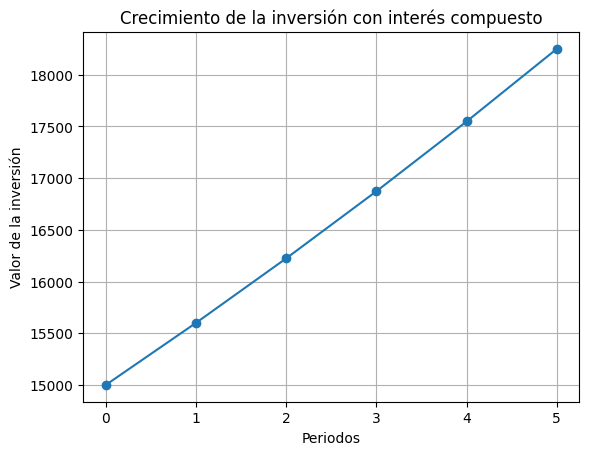

In [23]:
import matplotlib.pyplot as plt

def interes_compuesto(inversion_inicial, tasa_interes, periodos):
    valores = [inversion_inicial] # contiene la inversion inicial en un []
    
    for _ in range(periodos):
        inversion_inicial *= 1 + tasa_interes # seria 
        valores.append(inversion_inicial)
    
    return valores

def plot_interes_compuesto(valores):
    periodos = list(range(len(valores)))
    plt.plot(periodos, valores, marker='o')
    plt.xlabel('Periodos')
    plt.ylabel('Valor de la inversión')
    plt.title('Crecimiento de la inversión con interés compuesto')
    plt.grid(True)
    plt.show()

inversion_inicial = 15000  # Puedes cambiar este valor
tasa_interes = 0.04      # Puedes cambiar esta tasa de interés
periodos = 5            # Puedes cambiar la cantidad de periodos

valores = interes_compuesto(inversion_inicial, tasa_interes, periodos)
plot_interes_compuesto(valores)

In [24]:
600/12

50.0

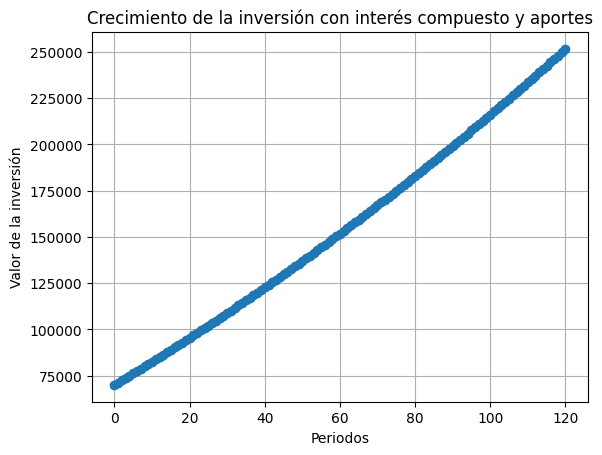

In [39]:
import matplotlib.pyplot as plt

def interes_compuesto_con_aportes(inversion_inicial, tasa_interes, periodos, aporte_periodico):
    valores = [inversion_inicial]
    
    for _ in range(periodos):
        inversion_inicial *= 1 + tasa_interes
        inversion_inicial += aporte_periodico
        valores.append(inversion_inicial)
    
    return valores

def plot_interes_compuesto(valores):
    periodos = list(range(len(valores)))
    plt.plot(periodos, valores, marker='o')
    plt.xlabel('Periodos')
    plt.ylabel('Valor de la inversión')
    plt.title('Crecimiento de la inversión con interés compuesto y aportes')
    plt.grid(True)
    plt.show()

inversion_inicial = 20000  # Puedes cambiar este valor
tasa_interes = 0.04/12      # Puedes cambiar esta tasa de interés
periodos = 12*10            # Puedes cambiar la cantidad de periodos
aporte_periodico = 1000   # Puedes cambiar el aporte mensual/anual

valores = interes_compuesto_con_aportes(inversion_inicial, tasa_interes, periodos, aporte_periodico)
plot_interes_compuesto(valores)

In [40]:
1000*12*10+70000

190000

In [ ]:
def volatilidad_varianza(symbol):
    # Símbolo de la acción que deseas analizar
    symbol = symbol

    # Fechas de inicio y fin del período
    start_date = '2020-12-07'
    end_date = '2020-12-09'

    # Obtener datos históricos de precios de la acción
    data = yf.download(symbol, start=start_date, end=end_date)

    # Calcular la varianza de los precios de cierre
    closing_prices = data['Close']
    variance = closing_prices.var()

    print("Varianza de los precios de cierre:", variance)
    return closing_prices

closing_prices = volatilidad_varianza('^GSPC')
    

In [ ]:
df

In [ ]:
def cuenta_perdidas_y_ganancias(df):
    """" 
    Aqui se tiene en cuenta:
    
    Ingresos(netIncomeContinuousOperations): Representa los ingresos generados por la venta de productos o servicios.
    Solo se tiene en cuenta los ingresos provenientes de operaciones regulares de la empresa,
    sin considerar eventos inusuales de ingresos que no forman parte de la operacion normal.
    
    Costo de Ventas(costOfRevenue): Corresponde a los costos directos asociados con la producción de los bienes 
    o servicios vendidos.
    
    
    Gastos Operativos(operatingExpense): Incluye gastos como ventas, marketing, administración y otros 
    gastos relacionados con la operación del negocio.
    Estos son los costos asociados con las operaciones continuas de una empresa, como salarios, servicios públicos y
    otros gastos diarios.
    
    Utilidad Neta (Beneficio Neto): Es la diferencia entre los ingresos totales y los gastos totales.
    Representa la ganancia o pérdida neta de la empresa.
    
    Hay que hacer la resta de la columna
    """
    df = df[['year','netIncomeContinuousOperations','costOfRevenue','operatingExpense','totalRevenue','totalExpenses']]
    df['utilidad_neta'] = df['totalRevenue'] - df['totalExpenses']
    
    df['ingresos-costo'] = df['netIncomeContinuousOperations'] - df['costOfRevenue']     
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))  # Tamaño de la figura

    # Plotear las tres columnas
    plt.plot(df['year'], df['totalRevenue'], label='Total Revenue')
    plt.plot(df['year'], df['totalExpenses'], label='Total Expenses')
    plt.plot(df['year'], df['utilidad_neta'], label='Net Income')

    # Agregar etiquetas y título
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Utilidad neta')
    plt.legend()  # Mostrar leyenda

    # Mostrar la gráfica
    plt.grid(True)  # Agregar cuadrícula
    plt.show()
    
    
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))  # Tamaño de la figura

    # Plotear las tres columnas
    plt.plot(df['year'], df['netIncomeContinuousOperations'], label='Ingresos generados por servicios ó ventas de productos')
    plt.plot(df['year'], df['costOfRevenue'], label='Coste de ventas')
    plt.plot(df['year'], df['ingresos-costo'], label='Margen_Bruto')

    # Agregar etiquetas y título
    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title('Margen_bruto')
    plt.legend()  # Mostrar leyenda

    # Mostrar la gráfica
    plt.grid(True)  # Agregar cuadrícula
    plt.show()    
    
    
    return df

cuenta_perdidas_y_ganancias(df = df)

In [ ]:
df.columns[27]

In [ ]:
a = df[['year','netIncomeContinuousOperations','costOfRevenue','operatingExpense','totalRevenue','totalExpenses']]
a['utilidad_neta'] = a['totalRevenue'] - a['totalExpenses']
a

In [ ]:
df

In [ ]:
df.iloc[:, [1, 3, 4, 8, 11, 12, 16, 17, 18, 21, 23, 25, 26, 28, 30, 31, 32, 33, 34]]


In [ ]:
data = {
    'fecha': ['1-01-2019', '1-01-2020', '1-01-2021','ROE'],
    'sp500': [3234.50,3756,4766],
